Referencias: Algumas referencias que ajudaram na escolha de Random Forest Regress. e SVR.

https://www.iunera.com/kraken/fabric/random-forest-vs-support-vector-machine-vs-neural-network/


https://heartbeat.fritz.ai/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7

# Random Forest Regress.

### Dezembro 2020

In [1]:
import pandas_datareader as web
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-01-31') 
#df.head()

Text(0, 0.5, 'Preco em $ USD')

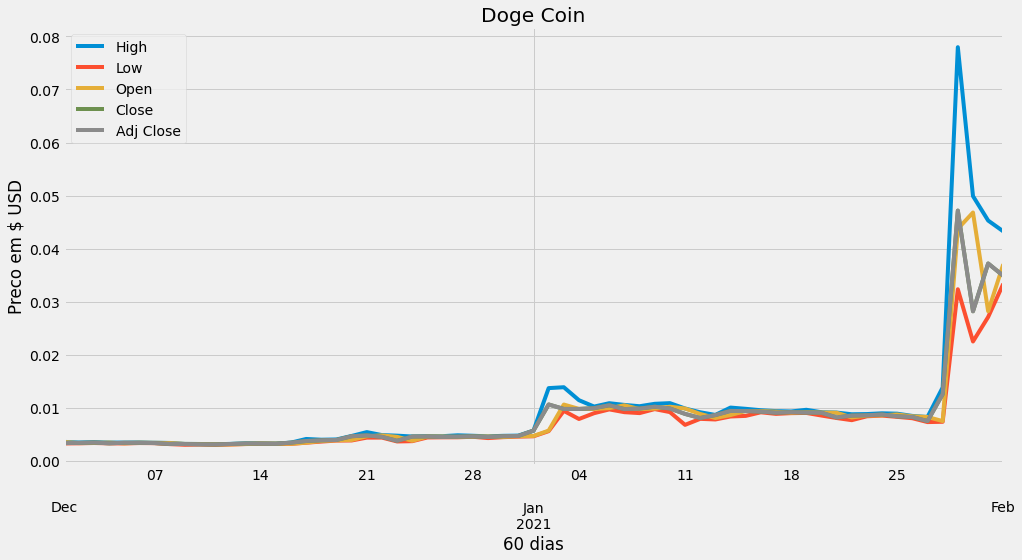

In [3]:
dec = df
dec = dec.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
dec.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [4]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2020-12-01,0.003335
2020-12-02,0.003374
2020-12-03,0.003428
2020-12-04,0.003298
2020-12-05,0.003397


In [5]:
# Prever n dias no futuro
predic_day = 30 #7 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [6]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.003335],
       [0.003374],
       [0.003428],
       [0.003298],
       [0.003397],
       [0.003388],
       [0.003342],
       [0.003179],
       [0.003158],
       [0.003105],
       [0.003079],
       [0.003163],
       [0.003256],
       [0.003231],
       [0.003206],
       [0.003416],
       [0.00373 ],
       [0.003858],
       [0.003927],
       [0.004625],
       [0.004787],
       [0.004508],
       [0.003768],
       [0.00457 ],
       [0.004582],
       [0.004494],
       [0.004548],
       [0.004592],
       [0.004486],
       [0.004636],
       [0.004682],
       [0.005685]])

In [7]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.004682, 0.005685, 0.010615, 0.009771, 0.009767, 0.00992 ,
       0.010465, 0.009742, 0.009846, 0.010194, 0.00986 , 0.008835,
       0.008063, 0.008616, 0.009397, 0.009369, 0.009265, 0.009067,
       0.009171, 0.009098, 0.00906 , 0.008166, 0.008524, 0.008579,
       0.008727, 0.008383, 0.008255, 0.007482, 0.012555, 0.047162,
       0.028176, 0.037196])

In [8]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [9]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.894993737701568


In [10]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.0095145 0.0087255 0.008491  0.0095695 0.008491  0.009767  0.008491 ]

Os valores reais para Doge Coin sao: [0.009846 0.009742 0.012555 0.009265 0.008383 0.00992  0.008166]


In [11]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [12]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.00329799996688962,
 0.0033970000222325325,
 0.003387999953702092,
 0.0033420000690966845,
 0.0031789999920874834,
 0.0031580000650137663,
 0.0031049998942762613,
 0.0030789999291300774,
 0.003163000103086233,
 0.0032560001127421856,
 0.0032309999223798513,
 0.0032059999648481607,
 0.003415999934077263,
 0.0037299999967217445,
 0.0038580000400543213,
 0.003926999866962433,
 0.004625000059604645,
 0.004786999896168709,
 0.0045079998672008514,
 0.003768000053241849,
 0.004569999873638153,
 0.0045819999650120735,
 0.004494000226259232,
 0.004548000171780586,
 0.004592000041157007,
 0.004486000165343285,
 0.004635999910533428,
 0.004681999795138836,
 0.005685000214725733,
 0.010614999569952488]

In [13]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.008917]
Previsto: [0.009767]
Previsto: [0.009767]
Previsto: [0.010465]
Previsto: [0.0087255]
Previsto: [0.0095145]
Previsto: [0.010194]
Previsto: [0.010027]
Previsto: [0.0095145]
Previsto: [0.008063]
Previsto: [0.008616]
Previsto: [0.008616]
Previsto: [0.009369]
Previsto: [0.0095695]
Previsto: [0.009841]
Previsto: [0.009841]
Previsto: [0.009098]
Previsto: [0.00906]
Previsto: [0.008491]
Previsto: [0.0095695]
Previsto: [0.008653]
Previsto: [0.008727]
Previsto: [0.008491]
Previsto: [0.008491]
Previsto: [0.007482]
Previsto: [0.008491]
Previsto: [0.047162]
Previsto: [0.028176]
Previsto: [0.023128]
Previsto: [0.023128]
----------
Preco Anterior Date
2020-12-04    0.009771
2020-12-05    0.009767
2020-12-06    0.009920
2020-12-07    0.010465
2020-12-08    0.009742
2020-12-09    0.009846
2020-12-10    0.010194
2020-12-11    0.009860
2020-12-12    0.008835
2020-12-13    0.008063
2020-12-14    0.008616
2020-12-15    0.009397
2020-12-16    0.009369
2020-12-17    0.009265
2020-12-18   

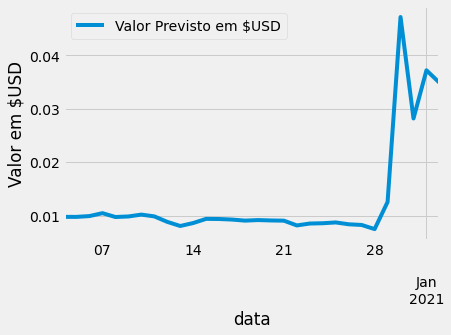

In [14]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD")# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

In [15]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

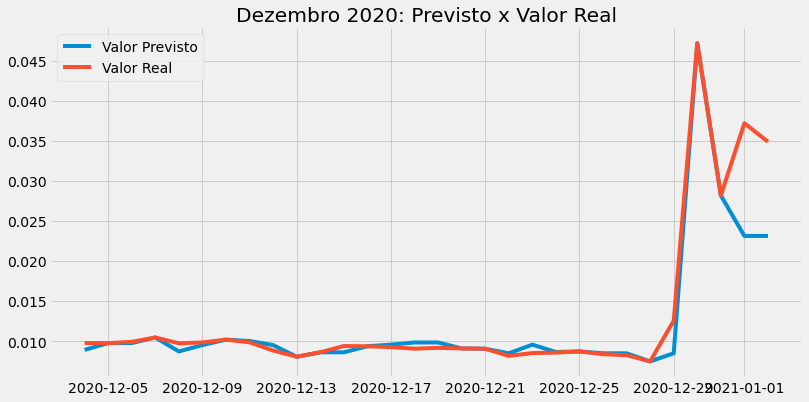

In [16]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Dezembro 2020: Previsto x Valor Real")
plt.legend()

### Janeiro 2021

In [17]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-01-01', end='2021-02-28') 
#df.head()

Text(0, 0.5, 'Preco em $ USD')

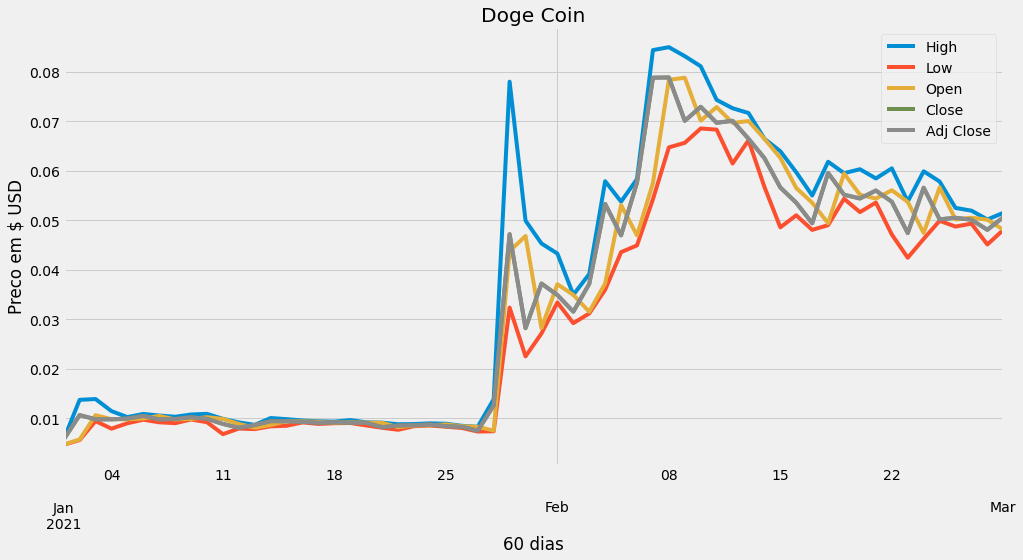

In [18]:
jan = df
jan = jan.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
jan.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [19]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-01-01,0.005685
2021-01-02,0.010615
2021-01-03,0.009771
2021-01-04,0.009767
2021-01-05,0.009920


In [20]:
# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [21]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.005685],
       [0.010615],
       [0.009771],
       [0.009767],
       [0.00992 ],
       [0.010465],
       [0.009742],
       [0.009846],
       [0.010194],
       [0.00986 ],
       [0.008835],
       [0.008063],
       [0.008616],
       [0.009397],
       [0.009369],
       [0.009265],
       [0.009067],
       [0.009171],
       [0.009098],
       [0.00906 ],
       [0.008166],
       [0.008524],
       [0.008579],
       [0.008727],
       [0.008383],
       [0.008255],
       [0.007482],
       [0.012555],
       [0.047162]])

In [22]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.037196, 0.034875, 0.03152 , 0.03712 , 0.053289, 0.046935,
       0.057595, 0.078782, 0.078825, 0.07007 , 0.072896, 0.069676,
       0.070069, 0.06645 , 0.062537, 0.056591, 0.05352 , 0.049376,
       0.059541, 0.055139, 0.054384, 0.05598 , 0.053725, 0.047392,
       0.056555, 0.050167, 0.05048 , 0.050083, 0.048052])

In [23]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [24]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.39837815796107856


In [25]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.050167  0.078825  0.0473575 0.078825  0.059541  0.054384 ]

Os valores reais para Doge Coin sao: [0.056555 0.034875 0.03152  0.046935 0.049376 0.037196]


In [26]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [27]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.005685000214725733,
 0.010614999569952488,
 0.009770999662578106,
 0.009766999632120132,
 0.009920000098645687,
 0.010464999824762344,
 0.00974200014024973,
 0.009846000000834465,
 0.010193999856710434,
 0.009859999641776085,
 0.008834999985992908,
 0.008062999695539474,
 0.008616000413894653,
 0.009397000074386597,
 0.009368999861180782,
 0.009265000000596046,
 0.009066999889910221,
 0.009170999750494957,
 0.009097999893128872,
 0.009060000069439411,
 0.008166000247001648,
 0.008523999713361263,
 0.008578999899327755,
 0.008727000094950199,
 0.008383000269532204,
 0.008255000226199627,
 0.007482000160962343,
 0.012555000372231007,
 0.047162000089883804,
 0.028176000341773033]

In [28]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.054384]
Previsto: [0.078825]
Previsto: [0.0473575]
Previsto: [0.0473575]
Previsto: [0.0452045]
Previsto: [0.078825]
Previsto: [0.0473575]
Previsto: [0.057951]
Previsto: [0.078825]
Previsto: [0.057951]
Previsto: [0.060144]
Previsto: [0.054384]
Previsto: [0.070069]
Previsto: [0.06645]
Previsto: [0.062537]
Previsto: [0.062537]
Previsto: [0.05352]
Previsto: [0.059541]
Previsto: [0.059541]
Previsto: [0.055139]
Previsto: [0.054384]
Previsto: [0.0548525]
Previsto: [0.053725]
Previsto: [0.047392]
Previsto: [0.050167]
Previsto: [0.050167]
Previsto: [0.054384]
Previsto: [0.064454]
Previsto: [0.048052]
Previsto: [0.064454]
----------
Preco Anterior Date
2021-01-01    0.037196
2021-01-02    0.034875
2021-01-03    0.031520
2021-01-04    0.037120
2021-01-05    0.053289
2021-01-06    0.046935
2021-01-07    0.057595
2021-01-08    0.078782
2021-01-09    0.078825
2021-01-10    0.070070
2021-01-11    0.072896
2021-01-12    0.069676
2021-01-13    0.070069
2021-01-14    0.066450
2021-01-15    

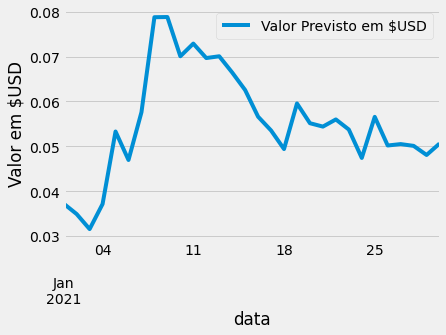

In [29]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD")# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

In [30]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

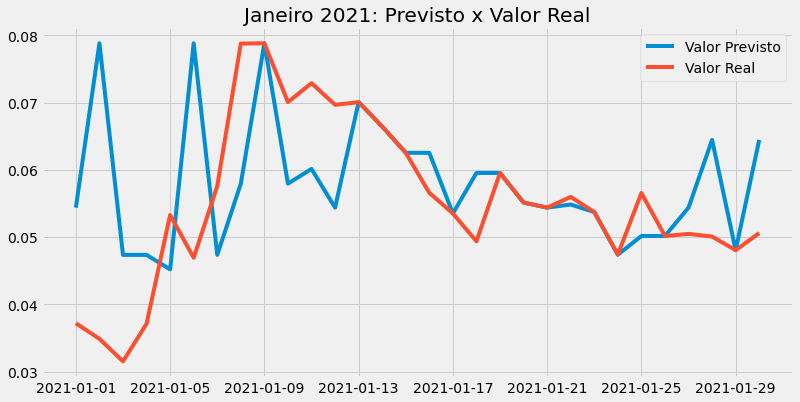

In [31]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Janeiro 2021: Previsto x Valor Real")
plt.legend()

### Fevereiro 2021

In [32]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-01-31') 
#df.head()

Text(0, 0.5, 'Preco em $ USD')

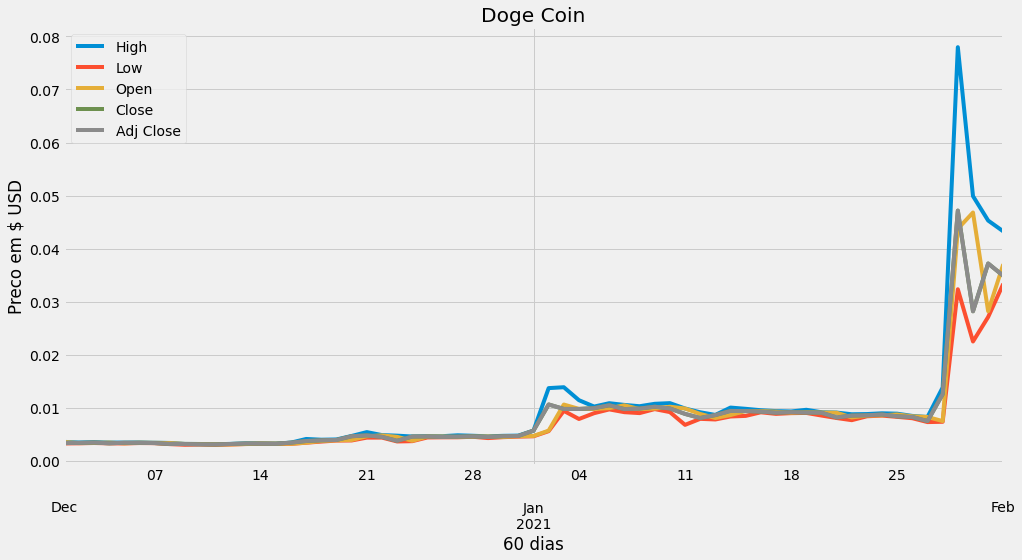

In [33]:
feb = df
feb = feb.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
feb.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [34]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2020-12-01,0.003335
2020-12-02,0.003374
2020-12-03,0.003428
2020-12-04,0.003298
2020-12-05,0.003397


In [35]:
# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [36]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.003335],
       [0.003374],
       [0.003428],
       [0.003298],
       [0.003397],
       [0.003388],
       [0.003342],
       [0.003179],
       [0.003158],
       [0.003105],
       [0.003079],
       [0.003163],
       [0.003256],
       [0.003231],
       [0.003206],
       [0.003416],
       [0.00373 ],
       [0.003858],
       [0.003927],
       [0.004625],
       [0.004787],
       [0.004508],
       [0.003768],
       [0.00457 ],
       [0.004582],
       [0.004494],
       [0.004548],
       [0.004592],
       [0.004486],
       [0.004636],
       [0.004682],
       [0.005685]])

In [37]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.004682, 0.005685, 0.010615, 0.009771, 0.009767, 0.00992 ,
       0.010465, 0.009742, 0.009846, 0.010194, 0.00986 , 0.008835,
       0.008063, 0.008616, 0.009397, 0.009369, 0.009265, 0.009067,
       0.009171, 0.009098, 0.00906 , 0.008166, 0.008524, 0.008579,
       0.008727, 0.008383, 0.008255, 0.007482, 0.012555, 0.047162,
       0.028176, 0.037196])

In [38]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [39]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.8956431335735036


In [40]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.0087955 0.008727  0.008166  0.0051835 0.008166  0.008727  0.047162 ]

Os valores reais para Doge Coin sao: [0.009171 0.007482 0.012555 0.010465 0.008383 0.008255 0.028176]


In [41]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [42]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.00329799996688962,
 0.0033970000222325325,
 0.003387999953702092,
 0.0033420000690966845,
 0.0031789999920874834,
 0.0031580000650137663,
 0.0031049998942762613,
 0.0030789999291300774,
 0.003163000103086233,
 0.0032560001127421856,
 0.0032309999223798513,
 0.0032059999648481607,
 0.003415999934077263,
 0.0037299999967217445,
 0.0038580000400543213,
 0.003926999866962433,
 0.004625000059604645,
 0.004786999896168709,
 0.0045079998672008514,
 0.003768000053241849,
 0.004569999873638153,
 0.0045819999650120735,
 0.004494000226259232,
 0.004548000171780586,
 0.004592000041157007,
 0.004486000165343285,
 0.004635999910533428,
 0.004681999795138836,
 0.005685000214725733,
 0.010614999569952488]

In [43]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.0072265]
Previsto: [0.0096445]
Previsto: [0.0078025]
Previsto: [0.0051835]
Previsto: [0.0092885]
Previsto: [0.009846]
Previsto: [0.010194]
Previsto: [0.010194]
Previsto: [0.008835]
Previsto: [0.008063]
Previsto: [0.008616]
Previsto: [0.009397]
Previsto: [0.009369]
Previsto: [0.0088945]
Previsto: [0.0087955]
Previsto: [0.0087955]
Previsto: [0.009098]
Previsto: [0.00906]
Previsto: [0.008166]
Previsto: [0.008524]
Previsto: [0.008727]
Previsto: [0.008727]
Previsto: [0.008166]
Previsto: [0.008727]
Previsto: [0.008727]
Previsto: [0.008166]
Previsto: [0.047162]
Previsto: [0.047162]
Previsto: [0.023128]
Previsto: [0.023128]
----------
Preco Anterior Date
2020-12-04    0.009771
2020-12-05    0.009767
2020-12-06    0.009920
2020-12-07    0.010465
2020-12-08    0.009742
2020-12-09    0.009846
2020-12-10    0.010194
2020-12-11    0.009860
2020-12-12    0.008835
2020-12-13    0.008063
2020-12-14    0.008616
2020-12-15    0.009397
2020-12-16    0.009369
2020-12-17    0.009265
2020-12-18

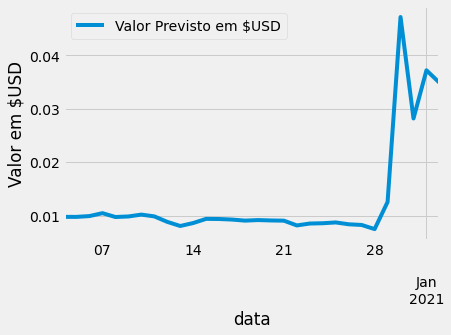

In [44]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD")# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

In [45]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

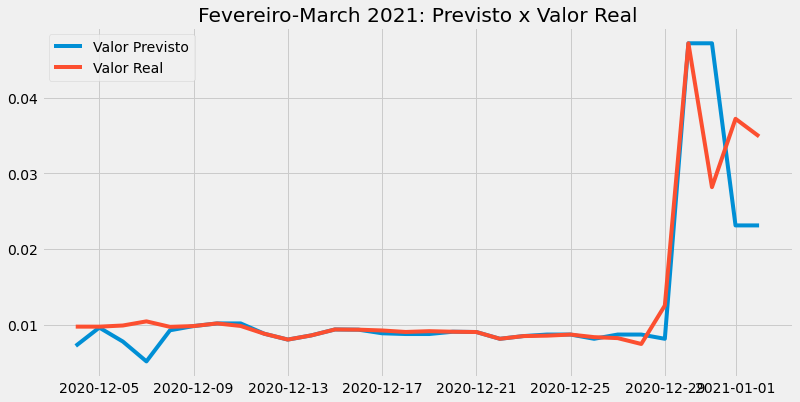

In [46]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Fevereiro-March 2021: Previsto x Valor Real")
plt.legend()

### March 2021

In [47]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-03-01', end='2021-04-30') 

#df.head()

Text(0, 0.5, 'Preco em $ USD')

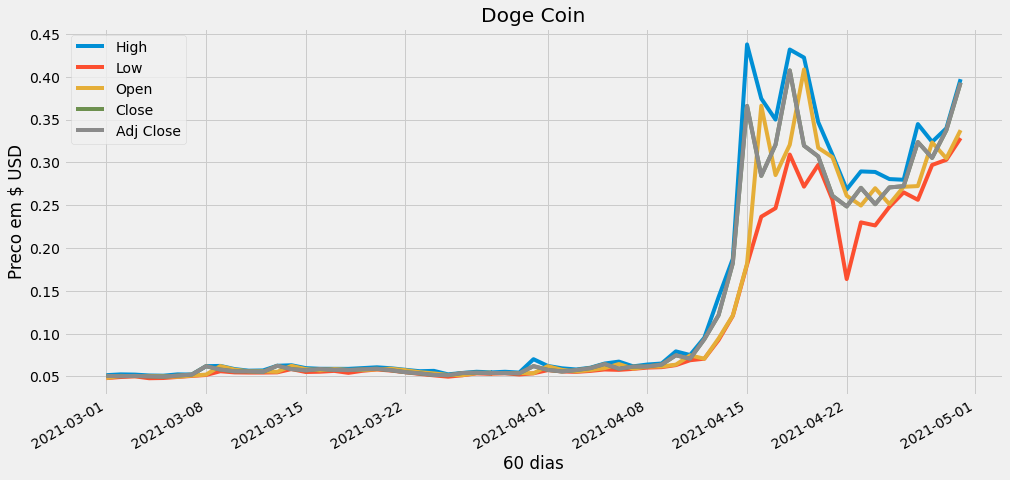

In [48]:
mar = df
mar = mar.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
mar.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [49]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-03-01,0.050599
2021-03-02,0.050262
2021-03-03,0.050592
2021-03-04,0.050048
2021-03-05,0.049609


In [50]:
# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [51]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.050599],
       [0.050262],
       [0.050592],
       [0.050048],
       [0.049609],
       [0.050984],
       [0.052122],
       [0.061949],
       [0.057998],
       [0.056004],
       [0.055918],
       [0.055349],
       [0.062432],
       [0.058592],
       [0.057088],
       [0.058607],
       [0.057653],
       [0.057383],
       [0.058328],
       [0.058961],
       [0.057234],
       [0.054962],
       [0.053556],
       [0.051702],
       [0.051448],
       [0.053952],
       [0.054377],
       [0.053698],
       [0.054052],
       [0.0539  ],
       [0.053657]])

In [52]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.053657  , 0.061986  , 0.057664  , 0.055804  , 0.057404  ,
       0.059696  , 0.064458  , 0.059028  , 0.061464  , 0.061684  ,
       0.063845  , 0.074649  , 0.070767  , 0.093445  , 0.121517  ,
       0.182207  , 0.36587   , 0.28417301, 0.32047501, 0.407318  ,
       0.3195    , 0.306925  , 0.26096699, 0.248509  , 0.27021199,
       0.251111  , 0.27067399, 0.27218801, 0.32368201, 0.30516899,
       0.33756101])

In [53]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [54]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.6986266462676465


In [55]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.057664   0.20696001 0.056734   0.056734   0.20696001 0.33756101
 0.20696001]

Os valores reais para Doge Coin sao: [0.053657   0.182207   0.057404   0.061986   0.070767   0.27218801
 0.059028  ]


In [56]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [57]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.050592001527547836,
 0.05004800111055374,
 0.049609001725912094,
 0.05098399892449379,
 0.052122000604867935,
 0.061948999762535095,
 0.05799800157546997,
 0.05600399896502495,
 0.055918000638484955,
 0.05534899979829788,
 0.062431998550891876,
 0.05859199911355972,
 0.05708799883723259,
 0.05860700085759163,
 0.057652998715639114,
 0.05738300085067749,
 0.05832799896597862,
 0.05896100029349327,
 0.05723400041460991,
 0.054962001740932465,
 0.05355599895119667,
 0.051702000200748444,
 0.051447998732328415,
 0.05395200103521347,
 0.0543770007789135,
 0.05369799956679344,
 0.054051999002695084,
 0.05389999970793724,
 0.05365699902176857,
 0.06198599934577942]

In [58]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.057664]
Previsto: [0.056734]
Previsto: [0.056734]
Previsto: [0.059696]
Previsto: [0.064458]
Previsto: [0.20696001]
Previsto: [0.061464]
Previsto: [0.069247]
Previsto: [0.069247]
Previsto: [0.074649]
Previsto: [0.20696001]
Previsto: [0.20696001]
Previsto: [0.121517]
Previsto: [0.20696001]
Previsto: [0.213667]
Previsto: [0.342685]
Previsto: [0.20696001]
Previsto: [0.20696001]
Previsto: [0.2205085]
Previsto: [0.306925]
Previsto: [0.26096699]
Previsto: [0.248509]
Previsto: [0.2593605]
Previsto: [0.27813999]
Previsto: [0.27067399]
Previsto: [0.33756101]
Previsto: [0.27813999]
Previsto: [0.30516899]
Previsto: [0.33756101]
Previsto: [0.20696001]
----------
Preco Anterior Date
2021-03-03    0.057664
2021-03-04    0.055804
2021-03-05    0.057404
2021-03-06    0.059696
2021-03-07    0.064458
2021-03-08    0.059028
2021-03-09    0.061464
2021-03-10    0.061684
2021-03-11    0.063845
2021-03-12    0.074649
2021-03-13    0.070767
2021-03-14    0.093445
2021-03-15    0.121517
2021-03-16

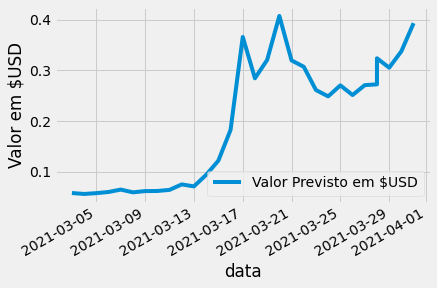

In [59]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD")# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

In [60]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

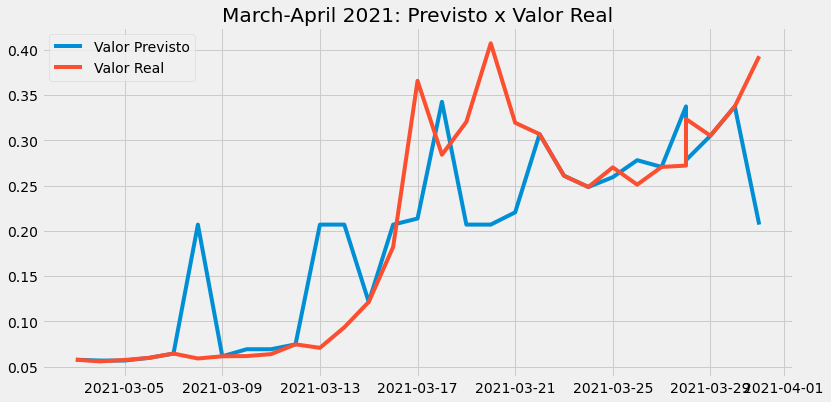

In [61]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("March-April 2021: Previsto x Valor Real")
plt.legend()

### Abril 2021

In [62]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-04-01', end='2021-05-31') 
#df.head()

Text(0, 0.5, 'Preco em $ USD')

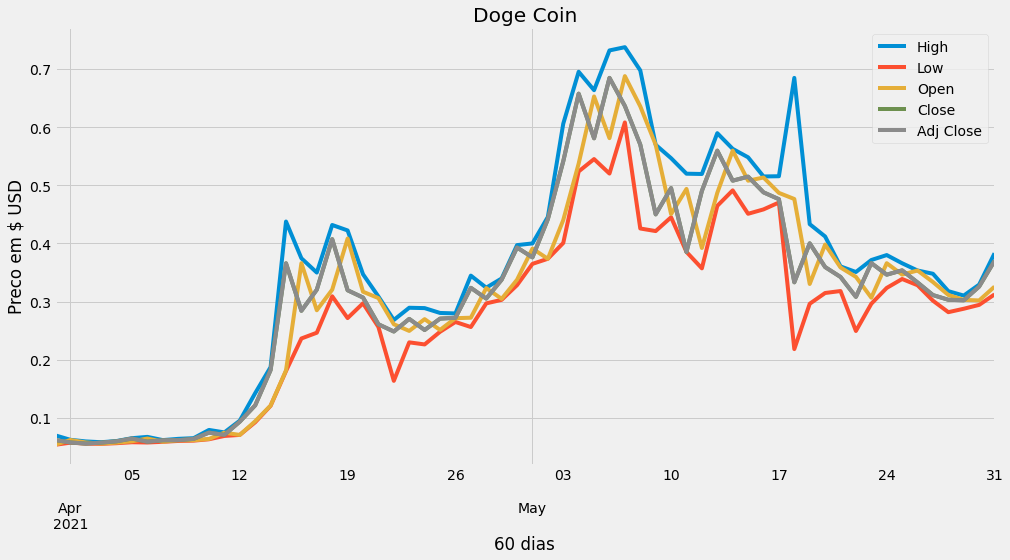

In [63]:
apr = df
apr = apr.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
apr.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [64]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-03-31,0.061986
2021-04-01,0.057664
2021-04-02,0.055804
2021-04-03,0.057404
2021-04-04,0.059696


In [65]:
# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [66]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.061986  ],
       [0.057664  ],
       [0.055804  ],
       [0.057404  ],
       [0.059696  ],
       [0.064458  ],
       [0.059028  ],
       [0.061464  ],
       [0.061684  ],
       [0.063845  ],
       [0.074649  ],
       [0.070767  ],
       [0.093445  ],
       [0.121517  ],
       [0.182207  ],
       [0.36587   ],
       [0.28417301],
       [0.32047501],
       [0.407318  ],
       [0.3195    ],
       [0.306925  ],
       [0.26096699],
       [0.248509  ],
       [0.27021199],
       [0.251111  ],
       [0.27067399],
       [0.27218801],
       [0.32368201],
       [0.30516899],
       [0.33756101],
       [0.39298701]])

In [67]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.39298701, 0.376046  , 0.44170699, 0.54133397, 0.65763301,
       0.58080399, 0.68477702, 0.63643903, 0.57007003, 0.44996399,
       0.495231  , 0.38537601, 0.490374  , 0.55960399, 0.507972  ,
       0.51489502, 0.487892  , 0.47611499, 0.333123  , 0.40019399,
       0.359382  , 0.34237099, 0.30807099, 0.366162  , 0.346302  ,
       0.35369301, 0.33294499, 0.311205  , 0.30311   , 0.30222401,
       0.32580999])

In [68]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [69]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.7464404939081748


In [70]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.487892   0.47611499 0.490374   0.490374   0.487892   0.487892
 0.60325453]

Os valores reais para Doge Coin sao: [0.30807099 0.40019399 0.55960399 0.507972   0.34237099 0.346302
 0.39298701]


In [71]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [72]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.05580399930477142,
 0.05740400031208992,
 0.059696000069379807,
 0.06445799767971039,
 0.05902799963951111,
 0.06146400049328804,
 0.06168400123715401,
 0.06384500116109848,
 0.07464899867773056,
 0.07076700031757355,
 0.09344500303268433,
 0.12151700258255005,
 0.18220700323581696,
 0.36586999893188477,
 0.28417301177978516,
 0.3204750120639801,
 0.40731799602508545,
 0.31949999928474426,
 0.3069249987602234,
 0.2609669864177704,
 0.2485090047121048,
 0.27021199464797974,
 0.2511110007762909,
 0.2706739902496338,
 0.2721880078315735,
 0.3236820101737976,
 0.3051689863204956,
 0.3375610113143921,
 0.3929870128631592,
 0.37604600191116333]

In [73]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.44170699]
Previsto: [0.54133397]
Previsto: [0.65763301]
Previsto: [0.57543701]
Previsto: [0.67120501]
Previsto: [0.60325453]
Previsto: [0.60325453]
Previsto: [0.51001701]
Previsto: [0.495231]
Previsto: [0.38537601]
Previsto: [0.490374]
Previsto: [0.490374]
Previsto: [0.490374]
Previsto: [0.4203525]
Previsto: [0.487892]
Previsto: [0.47611499]
Previsto: [0.333123]
Previsto: [0.47611499]
Previsto: [0.30311]
Previsto: [0.487892]
Previsto: [0.487892]
Previsto: [0.487892]
Previsto: [0.487892]
Previsto: [0.487892]
Previsto: [0.487892]
Previsto: [0.39365999]
Previsto: [0.30311]
Previsto: [0.3067145]
Previsto: [0.32580999]
Previsto: [0.4203525]
----------
Preco Anterior Date
2021-04-02    0.441707
2021-04-03    0.541334
2021-04-04    0.657633
2021-04-05    0.580804
2021-04-06    0.684777
2021-04-07    0.636439
2021-04-08    0.570070
2021-04-09    0.449964
2021-04-10    0.495231
2021-04-11    0.385376
2021-04-12    0.490374
2021-04-13    0.559604
2021-04-14    0.507972
2021-04-15   

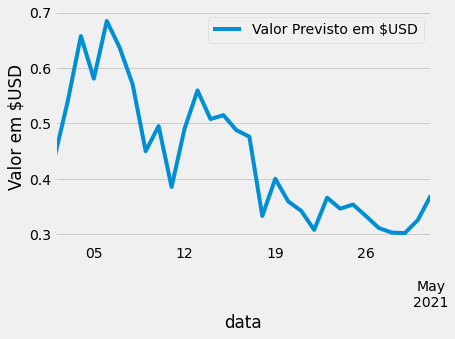

In [74]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD")# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

In [75]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

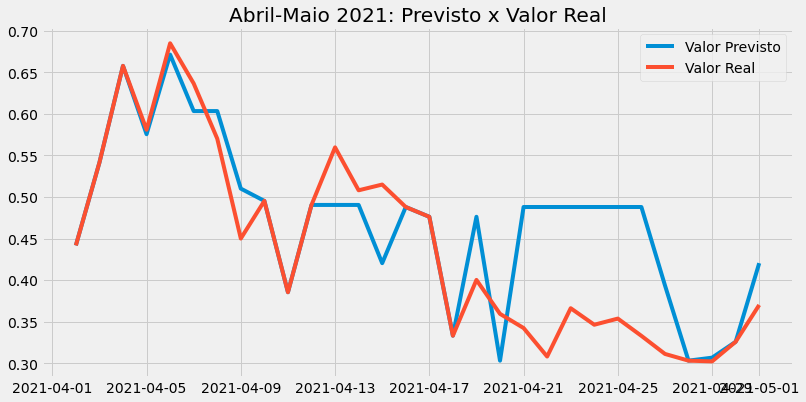

In [76]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Abril-Maio 2021: Previsto x Valor Real")
plt.legend()

### Maio 2021

In [77]:
# data mais recente, pegamos um range maior para compensar

In [78]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-04-01', end='2021-06-07') 
#df.head()

Text(0, 0.5, 'Preco em $ USD')

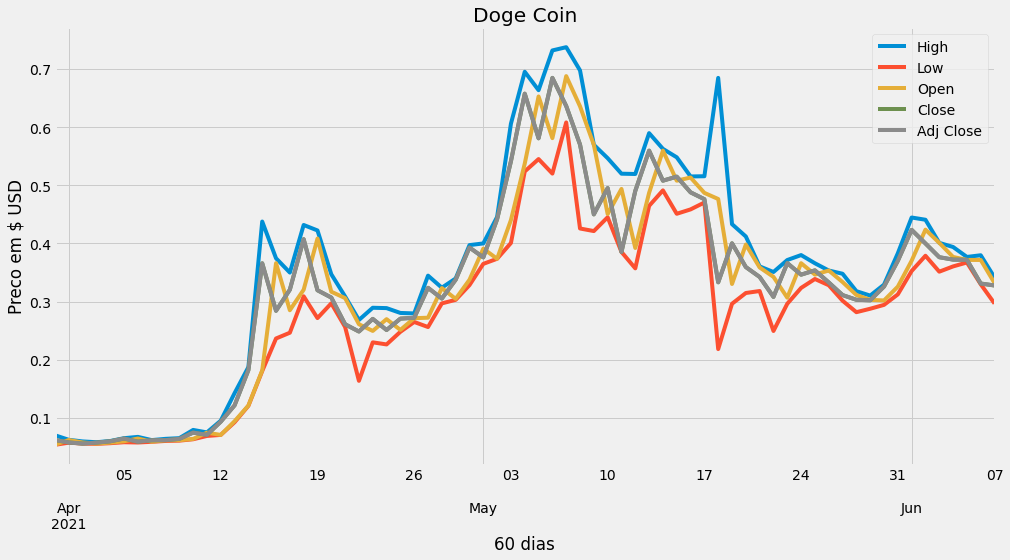

In [79]:
may = df
may = may.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
may.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [80]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-03-31,0.061986
2021-04-01,0.057664
2021-04-02,0.055804
2021-04-03,0.057404
2021-04-04,0.059696


In [81]:
# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [82]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.061986  ],
       [0.057664  ],
       [0.055804  ],
       [0.057404  ],
       [0.059696  ],
       [0.064458  ],
       [0.059028  ],
       [0.061464  ],
       [0.061684  ],
       [0.063845  ],
       [0.074649  ],
       [0.070767  ],
       [0.093445  ],
       [0.121517  ],
       [0.182207  ],
       [0.36587   ],
       [0.28417301],
       [0.32047501],
       [0.407318  ],
       [0.3195    ],
       [0.306925  ],
       [0.26096699],
       [0.248509  ],
       [0.27021199],
       [0.251111  ],
       [0.27067399],
       [0.27218801],
       [0.32368201],
       [0.30516899],
       [0.33756101],
       [0.39298701],
       [0.376046  ],
       [0.44170699],
       [0.54133397],
       [0.65763301],
       [0.58080399],
       [0.68477702],
       [0.63643903]])

In [83]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.39298701, 0.376046  , 0.44170699, 0.54133397, 0.65763301,
       0.58080399, 0.68477702, 0.63643903, 0.57007003, 0.44996399,
       0.495231  , 0.38537601, 0.490374  , 0.55960399, 0.507972  ,
       0.51489502, 0.487892  , 0.47611499, 0.333123  , 0.40019399,
       0.359382  , 0.34237099, 0.30807099, 0.366162  , 0.346302  ,
       0.35369301, 0.33294499, 0.311205  , 0.30311   , 0.30222401,
       0.32580999, 0.37007701, 0.423374  , 0.39996299, 0.37632301,
       0.372177  , 0.37180701, 0.33105001])

In [84]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [85]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.8097755112731145


In [86]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.48152852 0.33294499 0.33105001 0.68477702 0.495231   0.34433649
 0.54133397 0.490374  ]

Os valores reais para Doge Coin sao: [0.63643903 0.366162   0.37632301 0.65763301 0.38537601 0.507972
 0.44170699 0.55960399]


In [87]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])


In [88]:
x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.06384500116109848,
 0.07464899867773056,
 0.07076700031757355,
 0.09344500303268433,
 0.12151700258255005,
 0.18220700323581696,
 0.36586999893188477,
 0.28417301177978516,
 0.3204750120639801,
 0.40731799602508545,
 0.31949999928474426,
 0.3069249987602234,
 0.2609669864177704,
 0.2485090047121048,
 0.27021199464797974,
 0.2511110007762909,
 0.2706739902496338,
 0.2721880078315735,
 0.3236820101737976,
 0.3051689863204956,
 0.3375610113143921,
 0.3929870128631592,
 0.37604600191116333,
 0.44170698523521423,
 0.5413339734077454,
 0.6576330065727234,
 0.5808039903640747,
 0.684777021408081,
 0.6364390254020691,
 0.5700700283050537]

In [89]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.4214755]
Previsto: [0.495231]
Previsto: [0.495231]
Previsto: [0.490374]
Previsto: [0.490374]
Previsto: [0.34433649]
Previsto: [0.44248602]
Previsto: [0.487892]
Previsto: [0.47611499]
Previsto: [0.32946649]
Previsto: [0.40019399]
Previsto: [0.359382]
Previsto: [0.34237099]
Previsto: [0.34433649]
Previsto: [0.33294499]
Previsto: [0.34433649]
Previsto: [0.33294499]
Previsto: [0.33294499]
Previsto: [0.311205]
Previsto: [0.30311]
Previsto: [0.311205]
Previsto: [0.32946649]
Previsto: [0.37007701]
Previsto: [0.32946649]
Previsto: [0.3655065]
Previsto: [0.33105001]
Previsto: [0.35161351]
Previsto: [0.35142851]
Previsto: [0.33105001]
Previsto: [0.35161351]
----------
Preco Anterior Date
2021-04-09    0.449964
2021-04-10    0.495231
2021-04-11    0.385376
2021-04-12    0.490374
2021-04-13    0.559604
2021-04-14    0.507972
2021-04-15    0.514895
2021-04-16    0.487892
2021-04-17    0.476115
2021-04-18    0.333123
2021-04-19    0.400194
2021-04-20    0.359382
2021-04-21    0.342371
2

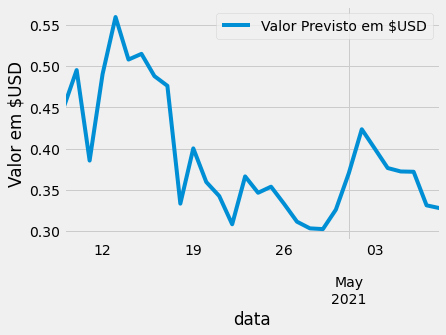

In [90]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD")# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

In [91]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

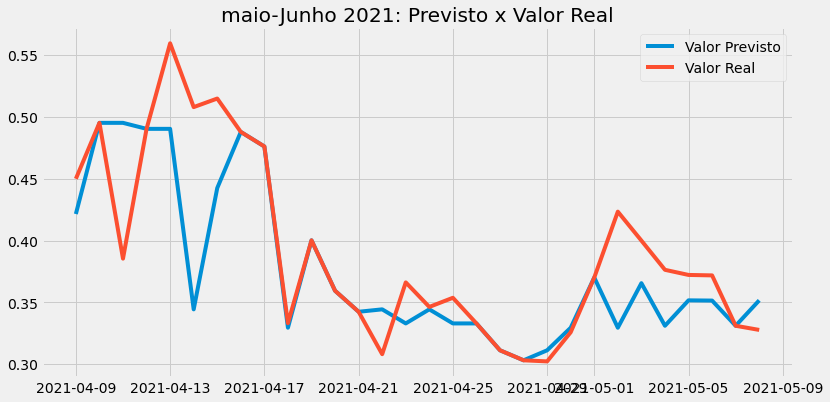

In [92]:
plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("maio-Junho 2021: Previsto x Valor Real")
plt.legend()